In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error , explained_variance_score

# Load the dataset
file_path = 'historical_farm_data_tamil_nadu.csv'
data = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
for column in ['crop_type', 'growth_stage', 'soil_type']:
    le = LabelEncoder()
    data[column + '_encoded'] = le.fit_transform(data[column])
    label_encoders[column] = le

# Select features and target variable
features = ['soil_moisture', 'temperature', 'humidity', 'rain_forecast', 
            'crop_type_encoded', 'growth_stage_encoded', 'soil_type_encoded']
X = data[features]
y = data['water_demand']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVR model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Adjust parameters as needed
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)

print(f"Model R^2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"explained_variance_score : {explained_variance_score(y_test,y_pred):.4f}")



Model R^2 Score: 0.0812
Root Mean Squared Error: 71.0065
explained_variance_score : 0.1304


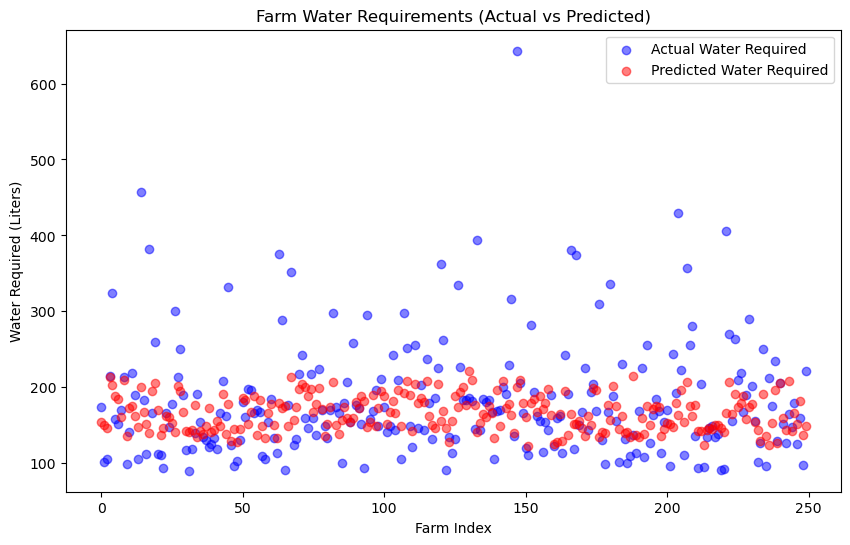

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a plot of predicted water requirements vs actual water requirements
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test[:250])), y_test[:250], color='blue', label='Actual Water Required', alpha=0.5)
plt.scatter(range(len(y_pred[:250])), y_pred[:250], color='red', label='Predicted Water Required', alpha=0.5)
plt.title('Farm Water Requirements (Actual vs Predicted)')
plt.xlabel('Farm Index')
plt.ylabel('Water Required (Liters)')
plt.legend()
plt.show()